In [1]:
import random
def randList(n):
  l = [None] * n
  for i in range(n):
      l[i] = [random.random(),random.random()]
  return l
 
L = randList(10)
L

[[0.6236363360353309, 0.28831857119692883],
 [0.28947137363405906, 0.23038650916911774],
 [0.3852924830836175, 0.8129888365838605],
 [0.1942258600728678, 0.8041340232816624],
 [0.0969660142886678, 0.7959222829741225],
 [0.032421137794444777, 0.03480557240934079],
 [0.4462420713070584, 0.5911446317138261],
 [0.014197975270189733, 0.16698339057960276],
 [0.5100401646941007, 0.5590232916832829],
 [0.840641969115517, 0.10913349378933634]]

In [2]:
def powerize(iterable):
   n =  len(iterable)
   ret = [None] * n
   for i in range(n):
        ret[i] = iterable[i][0]**iterable[i][1]
   return ret;
        
pw = powerize(L)
pw

[0.8727199774351332,
 0.7515557445427097,
 0.4605240654413568,
 0.267733975905208,
 0.15610899019140526,
 0.8875003334412458,
 0.6206481852004527,
 0.4914196313808795,
 0.68634746904626,
 0.9812338967355488]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(L)
df

,0,1
0,0.623636,0.288319
1,0.289471,0.230387
2,0.385292,0.812989
3,0.194226,0.804134
4,0.096966,0.795922
5,0.032421,0.034806
6,0.446242,0.591145
7,0.014198,0.166983
8,0.510040,0.559023
9,0.840642,0.109133


In [5]:
df[2] = df[[0][0]].pow(df[[1]][1])

In [6]:
df

,0,1,2
0,0.623636,0.288319,0.872720
1,0.289471,0.230387,0.751556
2,0.385292,0.812989,0.460524
3,0.194226,0.804134,0.267734
4,0.096966,0.795922,0.156109
5,0.032421,0.034806,0.887500
6,0.446242,0.591145,0.620648
7,0.014198,0.166983,0.491420
8,0.510040,0.559023,0.686347
9,0.840642,0.109133,0.981234


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib.pyplot import scatter
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
hdr = ["Type", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", \
       "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", \
       "Proline" ] 
wineC = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",names = hdr , header=None) 
wineC.head()


,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


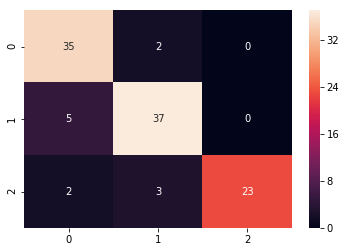

In [9]:
parameters = {"criterion":["gini","entropy"],"max_depth":[None,2,4,8,16],"min_samples_leaf":[1,2,3,4,5],"max_features": [None,13]}
TreeBeardC =  GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = parameters,return_train_score=True)

X = wineC.iloc[:,1:14]
y =  wineC.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1024)

TreeBeardC.fit(X=X_train,y=y_train)

y_pred = TreeBeardC.predict(X_test)
results = pd.DataFrame({"y_true":y_test, "y_pred": y_pred})
CM = confusion_matrix(y_true = results["y_true"], y_pred = results["y_pred"])
sns.heatmap(CM, annot = True, fmt="d")

### Wynik klasyfikacji wygląda nawet nieźle

In [10]:
wineRr = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";" ) 
wineRr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wineRw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";" ) 
wineRw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib.pyplot import scatter

RMSE =  0.7624807353527819


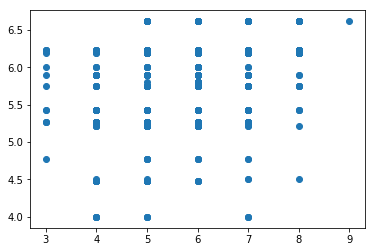

In [13]:
parameters = {"min_samples_split":[2,3,4],"max_depth":[None,2,4,8,16],"min_samples_leaf":[1,2,3,4,5]}
TreeBeardRw =  GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = parameters,return_train_score=True)

X = wineRw.iloc[:,0:11]
y =  wineRw.iloc[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1024)

TreeBeardRw.fit(X=X_train,y=y_train)

y_pred = TreeBeardRw.predict(X_test)
results = pd.DataFrame({"y_true":y_test, "y_pred": y_pred})
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE = ",RMSE)

scatter(y_test, y_pred)

RMSE =  0.702143706822972


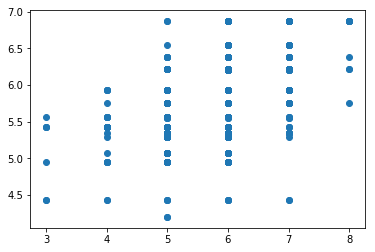

In [14]:
parameters = {"min_samples_split":[2,3,4],"max_depth":[None,2,4,8,16],"min_samples_leaf":[1,2,3,4,5]}
TreeBeardRr =  GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = parameters,return_train_score=True)

X = wineRr.iloc[:,0:11]
y =  wineRr.iloc[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1024)

TreeBeardRr.fit(X=X_train,y=y_train)

y_pred = TreeBeardRr.predict(X_test)
results = pd.DataFrame({"y_true":y_test, "y_pred": y_pred})
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE = ",RMSE)

scatter(y_test, y_pred)

## Bardzo słaby wynik regresji